# Linear Regression

Linear Regression is a key data science tool for predicting continuous outcomes. It predicts the relationship between two variables by assuming they have a straight-line connection. It finds the best line that minimizes the differences between predicted and actual values.

Linear regression aims to model the relationship between a dependent variable (Y) and one or more independent variables (X).

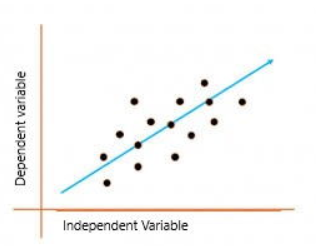

<!-- 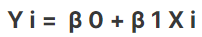 -->
## $y_i = \beta_0 + \beta_1x_i$

$y_i$  = Dependent variable (Output),  $\beta_0$  = constant/Intercept, $\beta_1$ = Slope/Intercept, $x_i$  = Independent variable.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# Load the data from the CSV file
file_path = 'homeprices.csv'
data = pd.read_csv(file_path)

In [14]:
# Display the first few rows of the data
print(data.head())

   area   price
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000


In [15]:
X = data['area'].values.reshape(-1, 1)
y = data['price'].values.reshape(-1, 1)

print(X)
print(y)

[[2600]
 [3000]
 [3200]
 [3600]
 [4000]]
[[550000]
 [565000]
 [610000]
 [680000]
 [725000]]


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
X_b = np.c_[np.ones((len(X_scaled), 1)), X_scaled] 

In [18]:
X_b

array([[ 1.        , -1.40693001],
       [ 1.        , -0.57932412],
       [ 1.        , -0.16552118],
       [ 1.        ,  0.66208471],
       [ 1.        ,  1.4896906 ]])

In [19]:
theta = np.random.randn(2,1)

In [20]:
theta

array([[-0.77834064],
       [-0.28869835]])

In [21]:
learning_rate = 0.01
n_iterations = 1000

# Cost Function
The cost function measures how well the model's predictions match the actual data <br>
In linear regression, the common cost function is the Mean Squared Error (MSE). <br>
For a hypothesis function $ℎ_𝜃(𝑥)$ defined as $ℎ_𝜃(𝑥)=𝜃_0+𝜃_1x$ <br>
the cost function $𝐽(𝜃_0,𝜃_1)$ is given by: <br>

## $J(\theta) = J(\theta_0, \theta_1) = \frac{1}{2m}  \sum_{i=1}^{m}(h_\theta(x^i) - y^i)^2$

Where <br>
* $m$ is the number of training examples. <br>
* $x^{(i)}$ is the input (feature) for the $i-th$ training example. <br>
* $y^{(i)}$ is the actual output (target) for the $i-th$ training example. <br>
* $h_\theta(x^i)$ is the predicted output for the $i-th$ training example given by $h_\theta(x^i) = \theta_0 + \theta_1x^i$ <br>

### Prediction Error
For each training example, we calculate the difference between the predicted value $h_\theta(x^i)$ and actual value $y^i$. This difference is called the prediction error: $h_\theta(x^i) = \theta_0 + \theta_1x^i$

### Squared Error
We square the prediction error for each training example to ensure it is non-negative and to penalizde larger errors more heavily $(h_\theta(x^i) = \theta_0 + \theta_1x^i)^2$

### Mean of Squared Errors
We sum the squared errors for all training examples and divide by $2𝑚 $ to get the average squared error. The factor of $2$ in the denominator is used to simplify the derivative calculations later.


In [22]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

# Gradient Descent

<img src="gradient_descent_parameter_a.gif" width="750" align="center">

Gradient descent is an optimization algorithm used to minimize the cost function by iteratively adjusting the parameters $\theta_0$ and $\theta_1$. The update rules for gradient descent are derived from the partial derivatives of the cost function with respect to each parameter.

For each $\theta_j$, the update rule is <br>

## $\theta_j = \theta_j - \alpha\frac{\partial J(\theta_0, \theta_1)}{\partial\theta_j}$

Where
* $\alpha $ is the learning rate, a small positive number that controls the step size. <br>
* $\frac{\partial J(\theta_0, \theta_1)}{\partial\theta_j}$ is the partial derivative of the cost function with respect to $\theta_j$

## Partial Derivatives

The partial derivatives of the cost function with respect to $\theta_0$: <br>
## $\frac{\partial J\theta}{\partial\theta_0} = \frac{\partial}{\partial \theta_0}(\frac{1}{2m}  \sum_{i=1}^{m}(h_\theta(x^i) - y^i)^2) $ 

The gradient of the cost function with respect to $\theta_0$ is the average of the prediction errors over all training examples.

The partial derivatives of the cost function with respect to $\theta_1$: <br>

## $\frac{\partial J\theta}{\partial\theta_1} = \frac{\partial}{\partial \theta_1}(\frac{1}{2m}  \sum_{i=1}^{m}(h_\theta(x^i) - y^i)^2)x^i $

The gradient of the cost function with respect to $\theta_1$ is the average of the product of the prediction errors and the input values $x^i$ over all training examples.

### Steps for Gradient Descent
1. Start with random initial values for $\theta_0$ and $\theta_1$.
2. Use the current values of $\theta_0$ and $\theta_1$ to make predictions $h_\theta(x^i)$ for all training examples.
3. Calculate the gradients $\frac{\partial J\theta}{\partial\theta_0}$ and $\frac{\partial J\theta}{\partial\theta_1}$.
4. Adjust the parameters by moving them in the direction opposite to the gradients. This is done by subtracting the product of the learning rate and the gradients from the current parameters: <br>
  ## $\theta_0 = \theta_0 - \alpha\frac{\partial J(\theta_0, \theta_1)}{\partial\theta_0}$ <br>

  ## $\theta_0 = \theta_0 - \alpha\frac{\partial J(\theta_0, \theta_1)}{\partial\theta_0}$ <br>
5. Repeat steps 2-4 until convergence (when the cost function no longer decreases significantly) or for a fixed number of iterations.


In [23]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    m = len(y)
    cost_history = np.zeros(n_iterations)
    
    for it in range(n_iterations):
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta = theta - learning_rate * gradients
        cost_history[it] = compute_cost(X, y, theta)
        
    return theta, cost_history

In [24]:
theta_best, cost_history = gradient_descent(X_b, y, theta, learning_rate, n_iterations)

In [25]:
print("Best parameters:", theta_best)

Best parameters: [[625972.97476552]
 [ 65626.31366156]]


In [26]:
# Predictions using the trained model
X_new = np.array([[0], [2]])  # New data points for prediction
X_new_b = np.c_[np.ones((2, 1)), X_new]  # Add a column of ones
y_predict = X_new_b.dot(theta_best)  # Make predictions

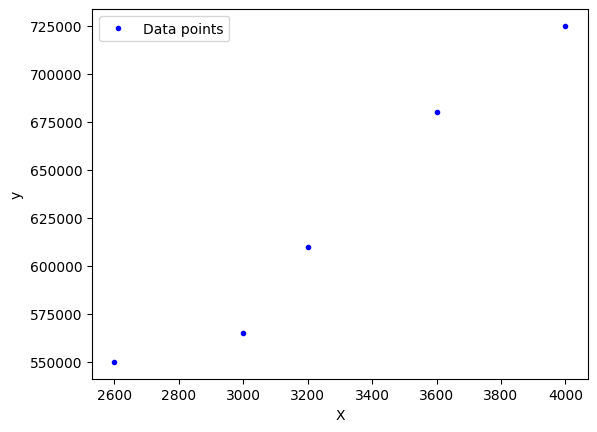

In [27]:
# Plotting the results
# plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.", label="Data points")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

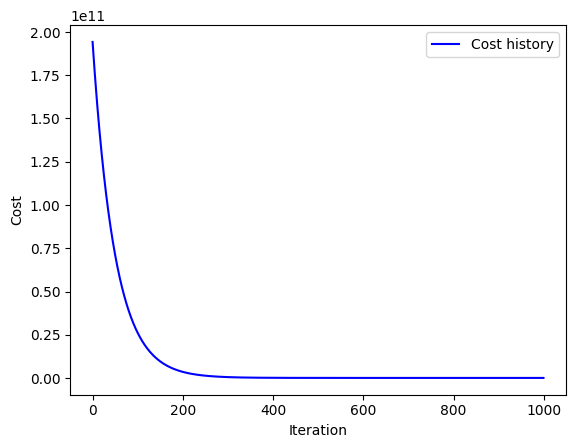

In [28]:
# Plotting cost history to visualize convergence
plt.plot(cost_history, "b-", label="Cost history")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.show()

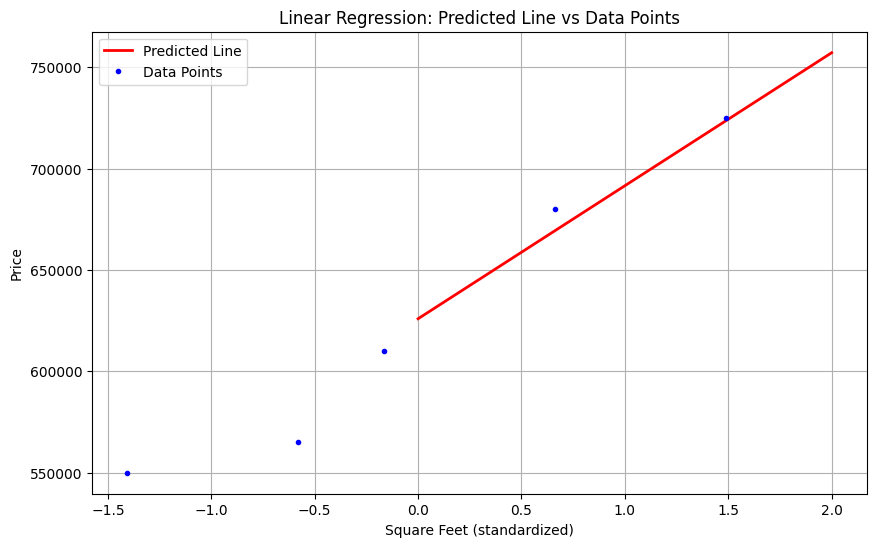

In [29]:
# Plotting the results
plt.figure(figsize=(10, 6))

plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predicted Line")
plt.plot(X_scaled, y, "b.", label="Data Points")
plt.xlabel("Square Feet (standardized)")
plt.ylabel("Price")
plt.title("Linear Regression: Predicted Line vs Data Points")
plt.legend()
plt.grid(True)
plt.show()

# Using Scikit-Learn

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
LR_Model = LinearRegression()

In [4]:
import pandas as pd
file_path = 'placement.csv'
data = pd.read_csv(file_path)

C:\Users\hp\AppData\Local\Temp\ipykernel_12004\2347378729.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
data

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [7]:
x = data['cgpa'].values.reshape(-1,1)
y = data['package'].values.reshape(-1,1)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [10]:
LR_Model.fit(x_train_scaled, y_train)

LinearRegression()

In [13]:
print("Intercept:", LR_Model.intercept_)
print("Coefficients:", LR_Model.coef_)

Intercept: [2.995875]
Coefficients: [[0.62421668]]


In [14]:
y_train_predict = LR_Model.predict(x_train_scaled)
y_test_predict = LR_Model.predict(x_test_scaled)

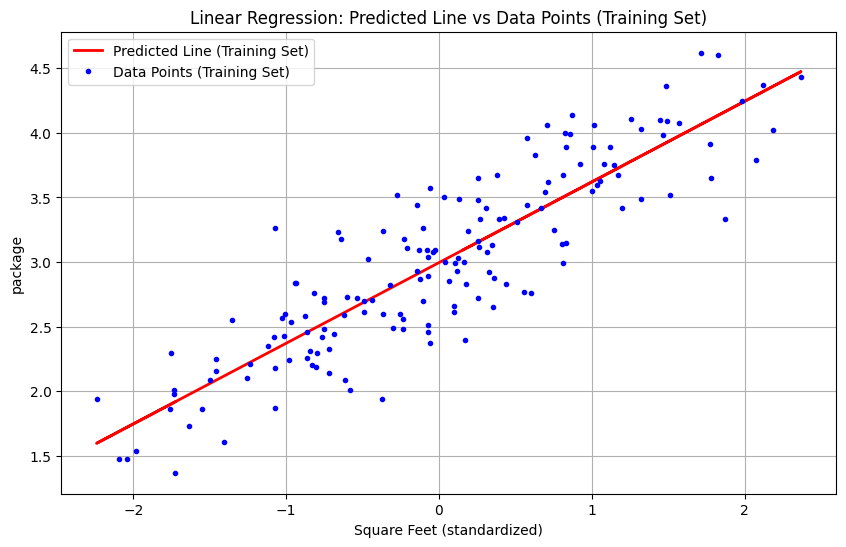

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(x_train_scaled, y_train_predict, "r-", linewidth=2, label="Predicted Line (Training Set)")
plt.plot(x_train_scaled, y_train, "b.", label="Data Points (Training Set)")
plt.xlabel("Square Feet (standardized)")
plt.ylabel("package")
plt.title("Linear Regression: Predicted Line vs Data Points (Training Set)")
plt.legend()
plt.grid(True)
plt.show()

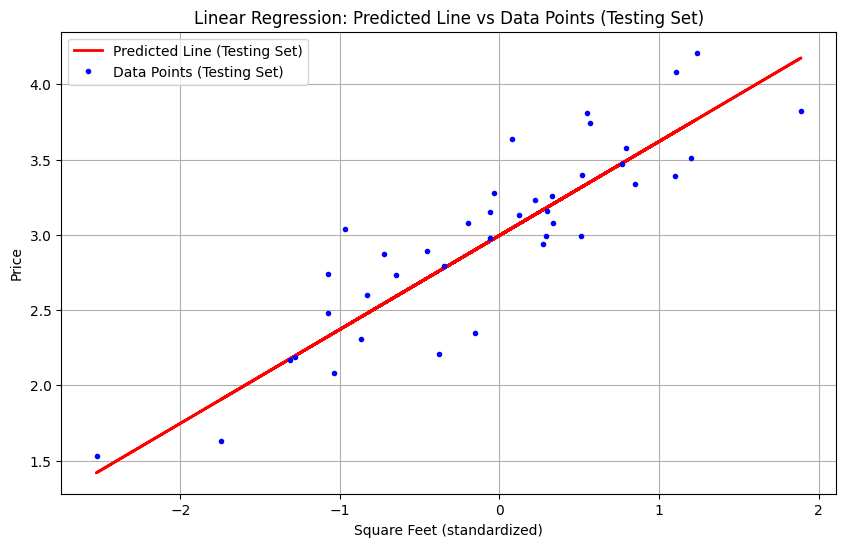

In [17]:
# Plotting the results for the testing set
plt.figure(figsize=(10, 6))
plt.plot(x_test_scaled, y_test_predict, "r-", linewidth=2, label="Predicted Line (Testing Set)")
plt.plot(x_test_scaled, y_test, "b.", label="Data Points (Testing Set)")
plt.xlabel("Square Feet (standardized)")
plt.ylabel("Price")
plt.title("Linear Regression: Predicted Line vs Data Points (Testing Set)")
plt.legend()
plt.grid(True)
plt.show()